In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [6]:
initial_data = yf.download("EA ^VIX", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  2 of 2 completed


In [7]:
initial_data.head()

Adj Close                  Close                   High  \
                    EA       ^VIX          EA       ^VIX          EA   
Date                                                                   
2020-09-30  129.766327  26.370001  130.410004  26.370001  131.990005   
2020-10-01  132.124619  26.700001  132.779999  26.700001  134.059998   
2020-10-02  128.432953  27.629999  129.070007  27.629999  132.240005   
2020-10-05  130.074799  27.959999  130.720001  27.959999  132.949997   
2020-10-06  124.223808  29.480000  124.839996  29.480000  130.399994   

                              Low                   Open              Volume  \
                 ^VIX          EA       ^VIX          EA       ^VIX       EA   
Date                                                                           
2020-09-30  27.120001  129.449997  25.059999  129.729996  26.690001  2164200   
2020-10-01  27.110001  131.460007  25.330000  132.070007  25.780001  1868800   
2020-10-02  29.900000  127.709999  26.930000  131.369995  28.870001  1751200   
2020-10-05  29.690001  129.070007  27.270000  130.089996  29.520000  1270100   
2020-10-06  30.000000  124.519997  26.010000  130.360001  28.049999  3753700   

                 
           ^VIX  
Date             
2020-09-30    0  
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0

In [8]:
initial_data.tail()

Adj Close                  Close                   High  \
                    EA       ^VIX          EA       ^VIX          EA   
Date                                                                   
2021-09-24  129.899994  17.750000  129.899994  17.750000  130.020004   
2021-09-27  131.979996  18.760000  131.979996  18.760000  132.559998   
2021-09-28  133.770004  23.250000  133.770004  23.250000  135.000000   
2021-09-29  137.940002  22.559999  137.940002  22.559999  139.589996   
2021-09-30  142.250000  23.139999  142.250000  23.139999  144.130005   

                              Low                   Open              Volume  \
                 ^VIX          EA       ^VIX          EA       ^VIX       EA   
Date                                                                           
2021-09-24  20.410000  126.860001  17.629999  127.040001  19.330000  2327300   
2021-09-27  19.320000  128.940002  17.740000  129.270004  17.780001  3326800   
2021-09-28  24.820000  131.520004  19.709999  131.860001  19.740000  4349800   
2021-09-29  23.790001  133.809998  21.450001  133.850006  22.070000  5656600   
2021-09-30  24.709999  138.850006  20.600000  139.309998  21.480000  5017700   

                 
           ^VIX  
Date             
2021-09-24    0  
2021-09-27    0  
2021-09-28    0  
2021-09-29    0  
2021-09-30    0

In [9]:
initial_data['Adj Close'].head()

,EA,^VIX
Date,,
2020-09-30,129.766327,26.370001
2020-10-01,132.124619,26.700001
2020-10-02,128.432953,27.629999
2020-10-05,130.074799,27.959999
2020-10-06,124.223808,29.480000


In [10]:
data =  initial_data['Adj Close']
EA = data['EA']
vix = data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-30 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EA      253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [11]:
data.head()

,EA,^VIX
Date,,
2020-09-30,129.766327,26.370001
2020-10-01,132.124619,26.700001
2020-10-02,128.432953,27.629999
2020-10-05,130.074799,27.959999
2020-10-06,124.223808,29.480000


In [12]:
data.tail()

,EA,^VIX
Date,,
2021-09-24,129.899994,17.750000
2021-09-27,131.979996,18.760000
2021-09-28,133.770004,23.250000
2021-09-29,137.940002,22.559999
2021-09-30,142.250000,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

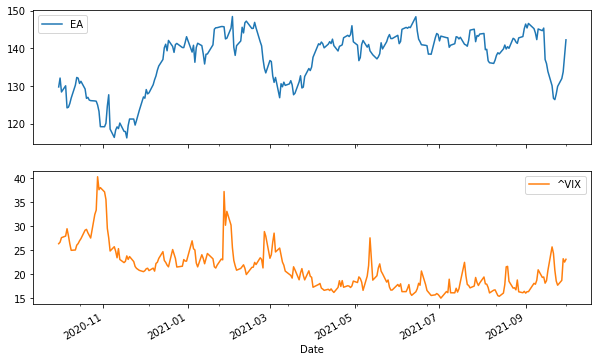

In [13]:
data.plot(figsize=(10, 6), subplots=True)

In [14]:
#SUMMARY STATISTICS

In [15]:
data.describe().round(2)

,EA,^VIX
count,253.00,253.00
mean,137.01,21.29
std,7.65,4.62
min,116.26,15.07
25%,131.43,17.69
50%,140.15,20.79
75%,142.49,23.25
max,148.43,40.28


In [30]:
vol = np.sqrt(253) * log_return.std()
print('The annualised volatility is', round(vol*100,0), '%')

The annualised volatility is EA       25.0
^VIX    132.0
dtype: float64 %


In [17]:
log_return = np.log(data / data.shift(1))

In [18]:
VIX = yf.download("^VIX", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  1 of 1 completed


In [19]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.14 %


In [20]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,EA,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0180,0.0124
2020-10-02,-0.0283,0.0342
2020-10-05,0.0127,0.0119
2020-10-06,-0.0460,0.0529


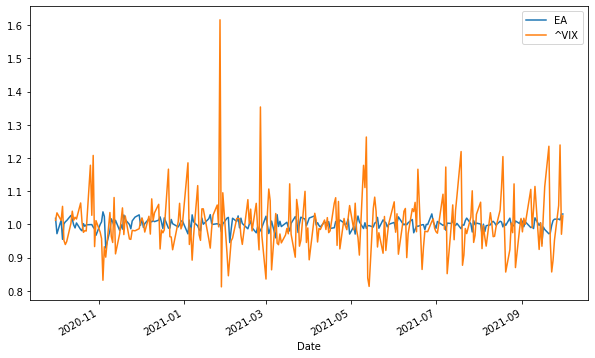

In [21]:
rets.apply(np.exp).plot(figsize=(10, 6));

In [22]:
data.pct_change().round(4).head()

,EA,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0182,0.0125
2020-10-02,-0.0279,0.0348
2020-10-05,0.0128,0.0119
2020-10-06,-0.0450,0.0544


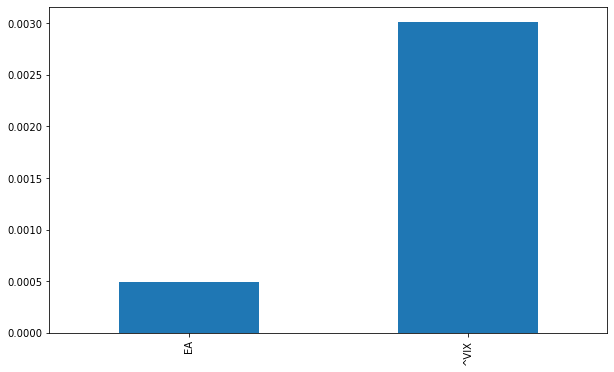

In [23]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [24]:
#MODEL Black-Scholes

In [25]:
EA[-1]  #spot price


142.25

In [26]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #Spot: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [27]:
euro_option_bsm(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'call')

14.90415258706372

In [71]:
euro_option_bsm(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'put')

13.09878287250342

In [72]:
T = np.linspace(0.25,3,50)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(142.25, 140, T[i], 0.0024, 0.0055, 0.25, 'call')

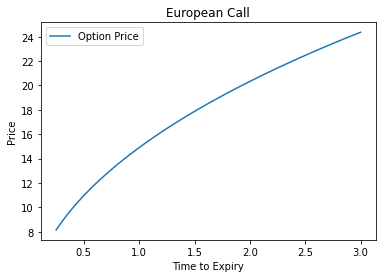

In [73]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

In [33]:
#Monte Carlo

In [34]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [76]:
T = 1
r = 0.0024
sigma = 0.25
S0 = 142.25
K = 140

In [77]:
S = mcs_simulation_np(1000)

In [78]:
S = np.transpose(S)
S

array([[142.25      , 141.52839091, 142.83367505, ..., 229.71033137,
        228.30220636, 227.46067126],
       [142.25      , 141.09713673, 141.0248055 , ..., 164.54337359,
        165.20880323, 164.43238591],
       [142.25      , 141.8578088 , 140.212629  , ..., 175.24382295,
        177.2436083 , 177.67303007],
       ...,
       [142.25      , 141.5511634 , 142.63940841, ..., 170.16805275,
        168.10212061, 168.43839867],
       [142.25      , 142.52260508, 141.65819299, ..., 134.05951458,
        134.25206761, 136.28479432],
       [142.25      , 141.695514  , 142.12404732, ..., 109.00191085,
        109.09945692, 109.83841998]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

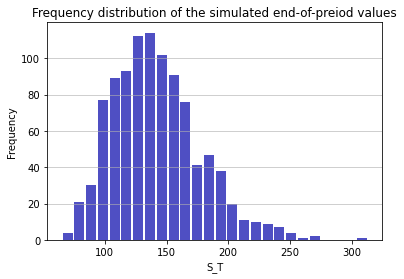

In [79]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [80]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 13.113064263325148


In [81]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 14.946036019710027


In [82]:
#greeks

In [83]:
#Delta

In [84]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [85]:
delta(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'call')

0.5668737760966039

In [86]:
delta(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'put')

-0.42764132121231513

In [87]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 140, 1, 0.0024, 0.0055, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 140, 1, 0.0024, 0.0055, 0.25, 'put')

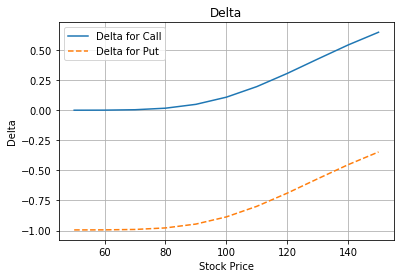

In [88]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [89]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 140, T[i], 0.0024, 0.0055, 0.25, 'call')

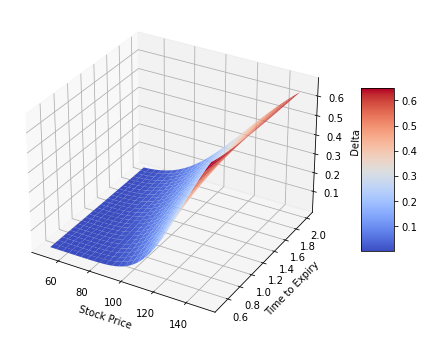

In [90]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [91]:
d = delta(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'call')
print('The value of Delta is', d.round(2),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(2), '.')

The value of Delta is 0.57 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.57 .


In [92]:
#Gamma

In [93]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [94]:
gamma(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'call')

0.011018448825141641

In [95]:
gamma(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'put')

0.011018448825141641

In [96]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 140, 1, 0.0024, 0.0055, 0.25, 'call')

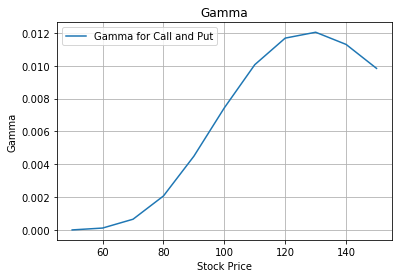

In [97]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [98]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 140, T[i], 0.0024, 0.0055, 0.25, 'call')

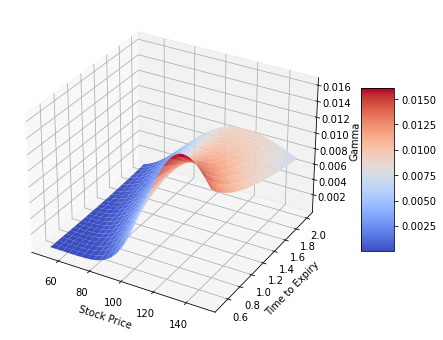

In [99]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [100]:
#Theta

In [101]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = -(vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T))) + q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -(vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T))) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [102]:
theta(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'call')

-6.660155930991446

In [103]:
theta(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'put')

-6.788761007887007

In [104]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(142.25, 140, T[i], 0.0024, 0.0055, 0.25, 'call')
    Theta_Put [i] = theta(142.25, 140, T[i], 0.0024, 0.0055, 0.25, 'put')

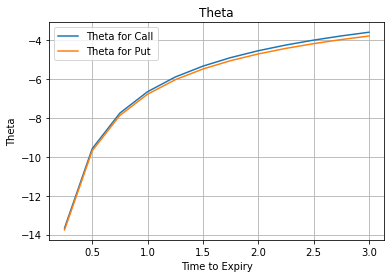

In [105]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [106]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 140, T[i], 0.0024, 0.0055, 0.25, 'call')

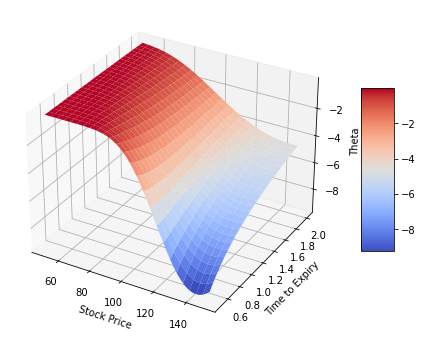

In [107]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [108]:
#Rho

In [109]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [110]:
rho(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'call')

65.7336420626782

In [111]:
rho(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'put')

-73.93076081495525

In [112]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(142.25, 140, 1, r[i], 0.0055, 0.25, 'call')
    Rho_Put [i] = rho(142.25, 140, 1, r[i], 0.0055, 0.25, 'put')

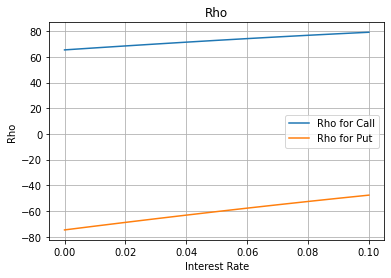

In [113]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [114]:
#Vega

In [115]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [116]:
vega(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'call')

55.56722448491679

In [117]:
vega(142.25, 140, 1, 0.0024, 0.0055, 0.25, 'put')

55.56722448491679

In [118]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(142.25, 140, 1, 0.0024, 0.0055, vol[i], 'call')

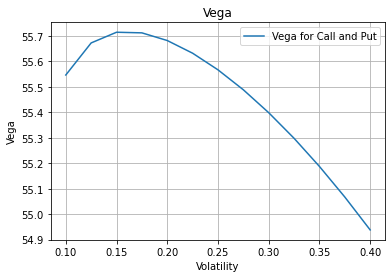

In [119]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [120]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 140, T[i], 0.0024, 0.0055, 0.25, 'call')

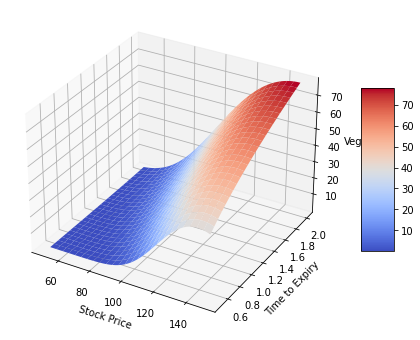

In [121]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);